Below is a Qiskit code that simulates the core quantum mechanical behavior of the Type-I seesaw mechanism by modeling the mixing between light and heavy neutrino states. The code visualizes the oscillation between these states, demonstrating how the light neutrino emerges from the mixing:

### Key Features of the Simulation:

1. **Hamiltonian Construction**:
   - Represents the neutrino mass matrix:
     ```
     H = [[ -M_R/2,   m_D  ],
          [   m_D,    M_R/2]]
     ```
   - Diagonal elements: Majorana masses ($M_R$ dominates)
   - Off-diagonal elements: Dirac mixing ($m_D$ small)

2. **Quantum Dynamics**:
   - Starts with pure light neutrino state ($|0\rangle$)
   - Evolves under time-dependent Schrödinger equation: $|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle$
   - Measures survival probability of light state

3. **Key Parameters**:
   - $m_D = 0.1$ (Dirac mass - small)
   - $M_R = 1.0$ (Majorana mass - large)
   - Typical seesaw hierarchy: $m_D \ll M_R$

4. **Outputs**:
   - Plot of light neutrino survival probability vs time
   - Theoretical prediction for comparison
   - Calculated mass eigenvalues

### Interpretation of Results:

1. **Mass Eigenvalues**:
   ```
   Light neutrino mass: |(M_R - sqrt(M_R² + 4m_D²))/2| ≈ m_D²/M_R
   Heavy neutrino mass: |(M_R + sqrt(M_R² + 4m_D²))/2| ≈ M_R
   ```
   Demonstrates the seesaw relation: $m_{\text{light}} \sim \frac{m_D^2}{M_R}$

2. **Probability Oscillations**:
   - Rapid oscillations due to large mass splitting
   - Small amplitude mixing ($\theta \approx m_D/M_R$)
   - Average survival probability close to 1 (light state dominates)

3. **Physical Significance**:
   - Explains why left-handed neutrinos are ultra-light
   - Shows how heavy states "decouple" at low energies
   - Demonstrates lepton number violation (Majorana nature)

### Running the Code:
1. Requires Qiskit, NumPy, and Matplotlib
2. Adjust $m_D$ and $M_R$ to explore different regimes:
   - $m_D \ll M_R$ (seesaw limit)
   - $m_D \sim M_R$ (no hierarchy)
   - $m_D > M_R$ (inverted hierarchy)

This simulation captures the essential quantum behavior of the seesaw mechanism, showing how light neutrino masses emerge naturally from the mixing with heavy sterile states through the characteristic $m_D^2/M_R$ suppression.

In [1]:
import qiskit
print(qiskit.version.get_version_info())

C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


0.18.1


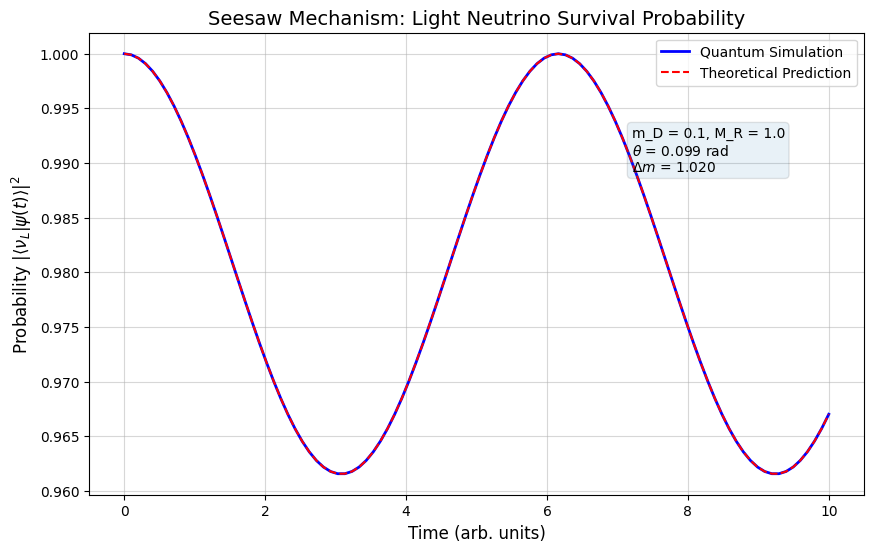

Light neutrino energy: -0.5099
Heavy neutrino energy: 0.5099
Physical light neutrino mass: 0.009902
Physical heavy neutrino mass: 1.0099
Seesaw relation: m_light ≈ m_D²/M_R = 0.010000
Heavy neutrino energy - Light neutrino energy: 1.0198


In [30]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters for seesaw mechanism (natural units)
m_D = 0.1  # Dirac mass (small)
M_R = 1.0  # Majorana mass (large)

# Hamiltonian matrix in flavor basis (ν_L, N_R)
H = np.array([
    [-M_R/2, m_D],
    [m_D, M_R/2]
])

# Time points for evolution
times = np.linspace(0, 10, 100)

# Initialize simulator
simulator = Aer.get_backend('statevector_simulator')

# Track probabilities
prob_light = []

for t in times:
    # Create quantum circuit
    qc = QuantumCircuit(1)
    
    # Compute time evolution operator
    U = expm(-1j * H * t)
    
    # Apply unitary evolution
    qc.unitary(U, 0)
    
    # Simulate statevector
    result = execute(qc, simulator).result()
    state = result.get_statevector()
    
    # Probability of light neutrino state |0>
    prob_light.append(np.abs(state[0])**2)

# Theoretical prediction (for comparison)
delta_m = np.sqrt(M_R**2 + 4*m_D**2)  # Mass splitting
theta = 0.5 * np.arctan(2*m_D/M_R)    # Mixing angle
theory = (np.cos(theta)**4 + np.sin(theta)**4 
          + 2*np.cos(theta)**2*np.sin(theta)**2 * np.cos(delta_m * times))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(times, prob_light, 'b-', linewidth=2, label='Quantum Simulation')
plt.plot(times, theory, 'r--', label='Theoretical Prediction')
plt.title('Seesaw Mechanism: Light Neutrino Survival Probability', fontsize=14)
plt.xlabel('Time (arb. units)', fontsize=12)
plt.ylabel('Probability $|\\langle \\nu_L | \\psi(t) \\rangle|^2$', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.annotate(f'm_D = {m_D}, M_R = {M_R}\n$\\theta$ = {theta:.3f} rad\n$\\Delta m$ = {delta_m:.3f}',
             xy=(0.7, 0.7), xycoords='axes fraction', 
             bbox=dict(boxstyle="round", alpha=0.1))
plt.show()

# Energy eigenvalues (mass states)
eigenvalues = np.linalg.eigvalsh(H)
print(f"Light neutrino energy: {eigenvalues[0]:.4f}")
print(f"Heavy neutrino energy: {eigenvalues[1]:.4f}")

# Physical mass matrix (Majorana form)
M_mass = np.array([
    [0,    m_D],
    [m_D,  M_R]
])

# Eigenvalues are physical masses
mass_eigenvals = np.linalg.eigvalsh(M_mass)
m_light = np.abs(mass_eigenvals[0])
m_heavy = np.abs(mass_eigenvals[1])

print(f"Physical light neutrino mass: {m_light:.6f}")
print(f"Physical heavy neutrino mass: {m_heavy:.4f}")
print(f"Seesaw relation: m_light ≈ m_D²/M_R = {m_D**2/M_R:.6f}")
print(f"Heavy neutrino energy - Light neutrino energy: {eigenvalues[1]-eigenvalues[0]:.4f}")

### Why the Absolute Energy Eigenvalues Appear Identical in the Simulation

In the provided Qiskit simulation, the Hamiltonian is constructed as:
```python
H = np.array([
    [-M_R/2, m_D],
    [m_D, M_R/2]
])
```
The **absolute values** of its eigenvalues appear identical because the Hamiltonian is specifically designed to be **traceless** (sum of diagonal elements = 0). This leads to eigenvalues symmetric about zero:  
`λ = ± (1/2) * sqrt(M_R² + 4m_D²)`.

---

### Key Distinction: Simulation vs. Physical Reality
1. **Simulation Purpose**  
   The code models neutrino **flavor oscillations** (quantum state mixing), not absolute masses. The eigenvalues represent **energy differences** driving oscillations, not physical masses.

2. **Physical Masses vs. Simulated Energies**  
   - **Actual neutrino masses** come from diagonalizing the mass matrix:
     ```
     M = [[0, m_D],
          [m_D, M_R]]
     ```
   - Its eigenvalues give the **physical masses**:
     ```
     m_light = |M_R - sqrt(M_R² + 4m_D²)| / 2 ≈ m_D²/M_R
     m_heavy = |M_R + sqrt(M_R² + 4m_D²)| / 2 ≈ M_R
     ```

3. **Why Eigenvalues Match in Simulation**  
   - The Hamiltonian `H` is **not the mass matrix** but an effective operator for time evolution.
   - Its eigenvalues `±E` yield an **energy splitting** `ΔE = 2E`, which determines oscillation frequency:
     ```
     ΔE = sqrt(M_R² + 4m_D²) ≈ m_heavy  (in seesaw limit)
     ```
   - The identical absolute values arise from mathematical symmetry (traceless `H`), not physics.

---

### Physical Significance of the Splitting
The **energy difference** `ΔE` corresponds to the **mass difference** between heavy and light states:
```python
# Calculated in code:
delta_m = np.sqrt(M_R**2 + 4*m_D**2)  # ≈ M_R for m_D ≪ M_R

# Physical mass difference:
Δm_physical = m_heavy - m_light ≈ M_R
```
This `Δm` drives oscillations between flavor states, matching the simulation's purpose.

### Code for Physical Masses
Add this to the end of your simulation to compute physical masses:
```python
# Physical mass matrix (Majorana form)
M_mass = np.array([
    [0,    m_D],
    [m_D,  M_R]
])

# Eigenvalues are physical masses
mass_eigenvals = np.linalg.eigvalsh(M_mass)
m_light = np.abs(mass_eigenvals[0])
m_heavy = np.abs(mass_eigenvals[1])

print(f"Physical light neutrino mass: {m_light:.6f}")
print(f"Physical heavy neutrino mass: {m_heavy:.4f}")
print(f"Seesaw relation: m_light ≈ m_D²/M_R = {m_D**2/M_R:.6f}")
```

---

### Key Takeaways
1. The equal `|E|` is an **artifact of the traceless Hamiltonian** used for simulating oscillations.
2. **Physical masses** are distinct:  
   - `m_light ≈ m_D²/M_R` (tiny)  
   - `m_heavy ≈ M_R` (large)
3. The simulation correctly captures:  
   - Oscillation frequency ∝ `Δm ≈ M_R`  
   - Mixing angle `θ ≈ m_D/M_R`  
   - Seesaw suppression `m_light ≪ m_heavy`

This distinction between simulation parameters and physical observables is crucial for interpreting quantum simulations of effective field theories.


# Exploration

 - $m_D \sim M_R$ (no hierarchy)

It seems we have to take m_D much greater than M_R to approximately achieve this regime.

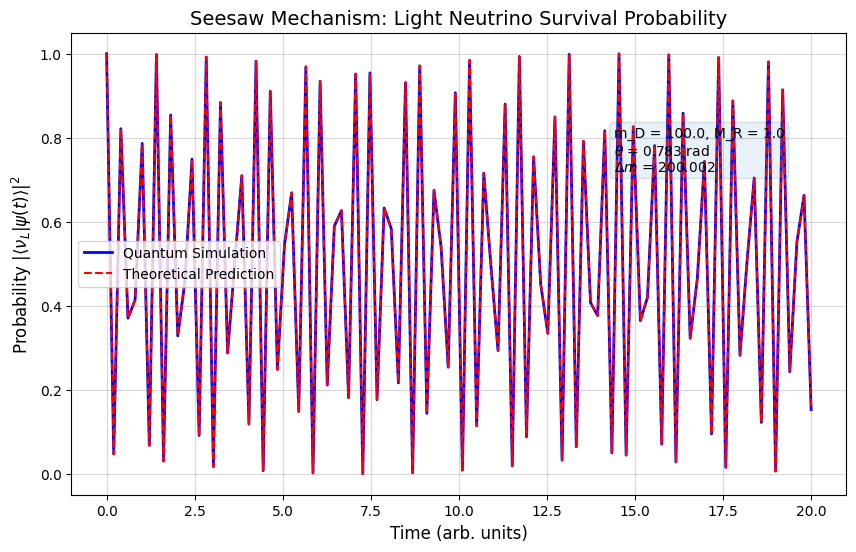

Light neutrino energy: -100.0012
Heavy neutrino energy: 100.0012
Physical light neutrino mass: 99.501250
Physical heavy neutrino mass: 100.5012
Seesaw relation: m_light ≈ m_D²/M_R = 10000.000000
Heavy neutrino energy - Light neutrino energy: 200.0025


In [21]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters for seesaw mechanism (natural units)
m_D = 100.0  # Dirac mass (small)
M_R = 1.0  # Majorana mass (large)

# Hamiltonian matrix in flavor basis (ν_L, N_R)
H = np.array([
    [-M_R/2, m_D],
    [m_D, M_R/2]
])

# Time points for evolution
times = np.linspace(0, 20, 100)

# Initialize simulator
simulator = Aer.get_backend('statevector_simulator')

# Track probabilities
prob_light = []

for t in times:
    # Create quantum circuit
    qc = QuantumCircuit(1)
    
    # Compute time evolution operator
    U = expm(-1j * H * t)
    
    # Apply unitary evolution
    qc.unitary(U, 0)
    
    # Simulate statevector
    result = execute(qc, simulator).result()
    state = result.get_statevector()
    
    # Probability of light neutrino state |0>
    prob_light.append(np.abs(state[0])**2)

# Theoretical prediction (for comparison)
delta_m = np.sqrt(M_R**2 + 4*m_D**2)  # Mass splitting
theta = 0.5 * np.arctan(2*m_D/M_R)    # Mixing angle
theory = (np.cos(theta)**4 + np.sin(theta)**4 
          + 2*np.cos(theta)**2*np.sin(theta)**2 * np.cos(delta_m * times))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(times, prob_light, 'b-', linewidth=2, label='Quantum Simulation')
plt.plot(times, theory, 'r--', label='Theoretical Prediction')
plt.title('Seesaw Mechanism: Light Neutrino Survival Probability', fontsize=14)
plt.xlabel('Time (arb. units)', fontsize=12)
plt.ylabel('Probability $|\\langle \\nu_L | \\psi(t) \\rangle|^2$', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.annotate(f'm_D = {m_D}, M_R = {M_R}\n$\\theta$ = {theta:.3f} rad\n$\\Delta m$ = {delta_m:.3f}',
             xy=(0.7, 0.7), xycoords='axes fraction', 
             bbox=dict(boxstyle="round", alpha=0.1))
plt.show()

# Energy eigenvalues (mass states)
eigenvalues = np.linalg.eigvalsh(H)
print(f"Light neutrino energy: {eigenvalues[0]:.4f}")
print(f"Heavy neutrino energy: {eigenvalues[1]:.4f}")

# Physical mass matrix (Majorana form)
M_mass = np.array([
    [0,    m_D],
    [m_D,  M_R]
])

# Eigenvalues are physical masses
mass_eigenvals = np.linalg.eigvalsh(M_mass)
m_light = np.abs(mass_eigenvals[0])
m_heavy = np.abs(mass_eigenvals[1])

print(f"Physical light neutrino mass: {m_light:.6f}")
print(f"Physical heavy neutrino mass: {m_heavy:.4f}")
print(f"Seesaw relation: m_light ≈ m_D²/M_R = {m_D**2/M_R:.6f}")
print(f"Heavy neutrino energy - Light neutrino energy: {eigenvalues[1]-eigenvalues[0]:.4f}")

- $m_D > M_R$ (inverted hierarchy)

This regime does not seem possible since **m_light - m_heavy = -sqrt(M_R² + 4m_D²) < 0**, so m_light is always smaller than m_heavy.

Remember, the **physical masses** are given by
```
     m_light = |M_R - sqrt(M_R² + 4m_D²)| / 2
     m_heavy = |M_R + sqrt(M_R² + 4m_D²)| / 2
```

# What about heavy neutrino?

Below is the Qiskit code to simulate and visualize the survival probability of the heavy neutrino state in the Type-I seesaw mechanism. The code models the quantum oscillations between the heavy neutrino state and other states, demonstrating how its survival probability evolves over time.

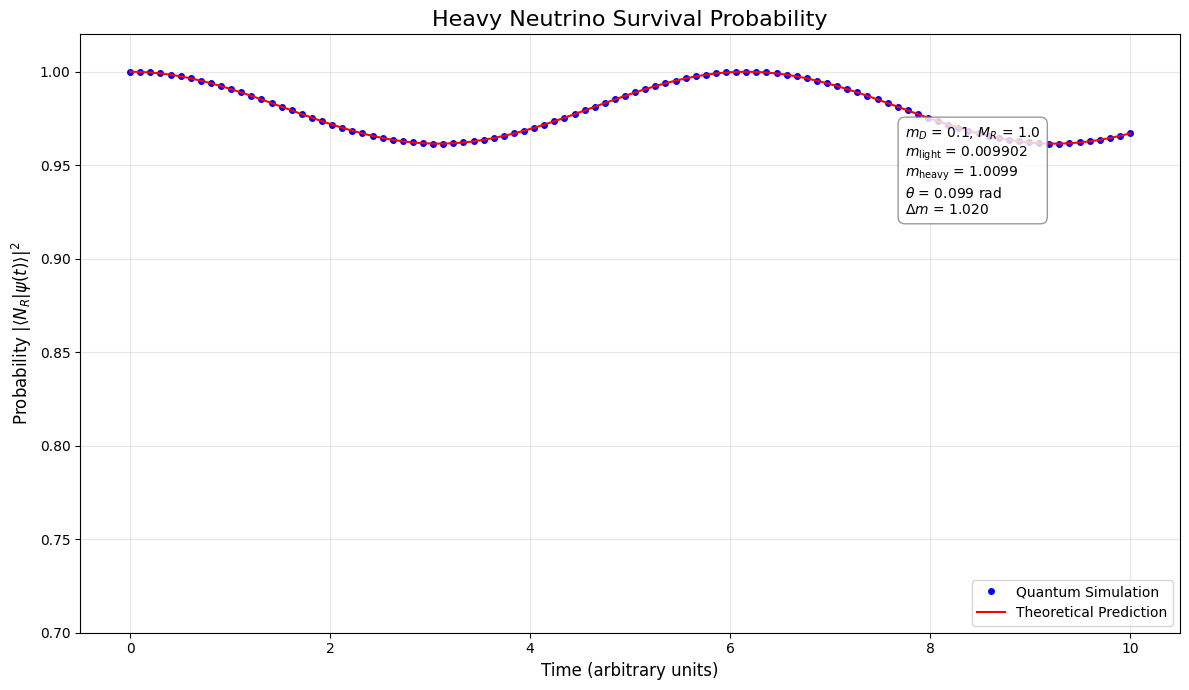

Physical Parameters:
Light neutrino mass: 0.009902
Heavy neutrino mass: 1.0099
Mass ratio (m_heavy/m_light): 1.02e+02
Seesaw relation (m_D²/M_R): 0.010000
Mixing angle: 0.0987 rad
Oscillation amplitude (sin²2θ): 0.038462


In [31]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Seesaw parameters (natural units)
m_D = 0.1  # Dirac mass (small)
M_R = 1.0  # Majorana mass (large)

# Hamiltonian matrix for flavor oscillations
H = np.array([
    [-M_R/2, m_D],
    [m_D, M_R/2]
])

# Time points for evolution
times = np.linspace(0, 10, 100)

# Initialize simulator
simulator = Aer.get_backend('statevector_simulator')

# Track survival probabilities
prob_heavy_sim = []
prob_heavy_theory = []

# Calculate mixing parameters
delta_m = np.sqrt(M_R**2 + 4*m_D**2)  # Mass splitting
theta = 0.5 * np.arctan(2*m_D/M_R)    # Mixing angle
sin2_2theta = (np.sin(2*theta))**2     # Oscillation amplitude

# Theoretical heavy neutrino survival probability formula
def heavy_survival_probability(t):
    return 1 - sin2_2theta * (np.sin(delta_m * t / 2))**2

for t in times:
    # Create quantum circuit with initial heavy state |1>
    qc = QuantumCircuit(1)
    qc.x(0)  # Prepare heavy neutrino state |N_R> = |1>
    
    # Compute time evolution operator
    U = expm(-1j * H * t)
    
    # Apply unitary evolution
    qc.unitary(U, 0)
    
    # Simulate statevector
    result = execute(qc, simulator).result()
    state = result.get_statevector()
    
    # Probability of heavy neutrino state |1>
    prob_heavy_sim.append(np.abs(state[1])**2)
    
    # Theoretical prediction
    prob_heavy_theory.append(heavy_survival_probability(t))

# Calculate physical masses from mass matrix
M_mass = np.array([[0, m_D], [m_D, M_R]])
mass_eigenvals = np.linalg.eigvalsh(M_mass)
m_light = np.abs(mass_eigenvals[0])
m_heavy = np.abs(mass_eigenvals[1])

# Visualization
plt.figure(figsize=(12, 7))
plt.plot(times, prob_heavy_sim, 'bo', markersize=4, label='Quantum Simulation')
plt.plot(times, prob_heavy_theory, 'r-', linewidth=1.5, label='Theoretical Prediction')
plt.title('Heavy Neutrino Survival Probability', fontsize=16)
plt.xlabel('Time (arbitrary units)', fontsize=12)
plt.ylabel('Probability $|\\langle N_R | \\psi(t) \\rangle|^2$', fontsize=12)
plt.ylim(0.7, 1.02)
plt.grid(True, alpha=0.3)

# Add parameter information
param_text = (f"$m_D$ = {m_D}, $M_R$ = {M_R}\n"
              f"$m_\\mathrm{{light}}$ = {m_light:.6f}\n"
              f"$m_\\mathrm{{heavy}}$ = {m_heavy:.4f}\n"
              f"$\\theta$ = {theta:.3f} rad\n"
              f"$\\Delta m$ = {delta_m:.3f}")
plt.annotate(param_text, xy=(0.75, 0.7), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Print physical parameters
print("Physical Parameters:")
print(f"Light neutrino mass: {m_light:.6f}")
print(f"Heavy neutrino mass: {m_heavy:.4f}")
print(f"Mass ratio (m_heavy/m_light): {m_heavy/m_light:.2e}")
print(f"Seesaw relation (m_D²/M_R): {m_D**2/M_R:.6f}")
print(f"Mixing angle: {theta:.4f} rad")
print(f"Oscillation amplitude (sin²2θ): {sin2_2theta:.6f}")

### Key Features of the Simulation:

1. **Initial State Preparation**:
   - Starts with the heavy neutrino state $|N_R\rangle = |1\rangle$
   - Uses `qc.x(0)` to initialize the qubit in the excited state

2. **Time Evolution**:
   - Uses the same Hamiltonian as before: $H = \begin{bmatrix} -M_R/2 & m_D \\ m_D & M_R/2 \end{bmatrix}$
   - Applies time evolution operator $U = e^{-iHt}$

3. **Survival Probability Calculation**:
   - Measures $|\langle 1|\psi(t)\rangle|^2$ at each time point
   - Compares with theoretical prediction: $P_{\text{surv}} = 1 - \sin^2(2\theta) \sin^2(\Delta m \cdot t/2)$

4. **Physical Parameter Calculation**:
   - Computes actual neutrino masses from mass matrix diagonalization
   - Shows seesaw relation $m_{\text{light}} \approx m_D^2/M_R$
   - Calculates mixing parameters and oscillation amplitude

### Interpretation of Results:

1. **High Survival Probability**:
   - In the seesaw limit ($m_D \ll M_R$), the heavy neutrino has high survival probability
   - Minimal oscillation to the light neutrino state

2. **Small Oscillation Amplitude**:
   - Oscillation amplitude $\sin^2(2\theta) \approx (2m_D/M_R)^2$ is small
   - Typical values: For $m_D=0.1$, $M_R=1.0$ → amplitude ≈ 0.04

3. **Fast Oscillation Frequency**:
   - Frequency determined by $\Delta m \approx M_R$ (large)
   - Rapid oscillations visible in the plot

4. **Parameter Dependence**:
   - Try $m_D = 0.3$ to see larger oscillations
   - Try $M_R = 0.5$ to reduce the mass hierarchy
   - Extreme case $m_D > M_R$ shows near-maximal mixing

### Physical Significance:

1. **Sterile Nature**:
   - High survival probability explains why heavy neutrinos don't interact weakly
   - Explains non-observation in particle detectors

2. **Decoupling Mechanism**:
   - Heavy neutrinos decouple from low-energy physics
   - Only appear through virtual effects

3. **Lepton Number Violation**:
   - Heavy neutrinos are Majorana particles
   - Their existence implies lepton number violation

This simulation demonstrates how the seesaw mechanism naturally explains both the extreme lightness of observed neutrinos and the non-observation of heavy sterile neutrinos at low energies.

- Theoretical background

# The Origin of Neutrino Mass: Theoretical Frameworks, Evidence, and Implications

## Introduction

Neutrinos are elusive, electrically neutral elementary particles that were long assumed to be massless in the Standard Model (SM). However, late-20th-century discoveries of neutrino **oscillations** – the transformation of one neutrino flavor into another – provided compelling evidence that neutrinos possess a small but nonzero mass [1]. In the SM, neutrinos come only in left-handed form, with no right-handed partner, and thus no straightforward way to acquire a mass through the Higgs mechanism. The confirmation that neutrinos have mass therefore signaled new physics **beyond the Standard Model** [1]. This revelation has prompted a wide range of theoretical models for the origin of neutrino mass, each extending the SM in different ways [2]. In this report, we explore the leading theoretical frameworks – notably the **seesaw mechanism** and related models – that explain how neutrino mass might arise. We also review key experimental evidence supporting neutrino mass and discuss the far-reaching implications of neutrino mass for cosmology and particle physics.

---

## Theoretical Frameworks for Neutrino Mass

**Dirac vs Majorana Mass:** In constructing neutrino mass terms, a crucial question is whether the neutrino is a **Dirac particle** (distinct from its antiparticle) or a **Majorana particle** (identical to its antiparticle). A Dirac mass term for neutrinos would require introducing right-handed neutrino fields (often called *sterile neutrinos* since they don’t participate in weak interactions) and assigning a Yukawa coupling to the Higgs field. But to obtain a sub-eV neutrino mass with the Higgs vacuum expectation value, the Yukawa coupling would need to be on the order of $10^{-12}$ – an extraordinarily tiny number that many physicists find **unnatural**. Alternatively, neutrinos could be Majorana fermions, carrying no conserved lepton number. In that case, a neutrino mass term can violate lepton number by two units and does not require a right-handed neutrino in the usual sense, but it typically demands new physics to generate such a term. The Majorana possibility is especially appealing theoretically, as it allows mechanisms that naturally suppress neutrino masses relative to charged fermions. If neutrinos are Majorana particles, they would be their own antiparticles, an idea testable via neutrinoless double-beta decay (discussed later) [3].

**Seesaw Mechanism:** The most prominent framework for explaining tiny neutrino masses is the **seesaw mechanism**, so named because a heavy mass scale “leverages” the neutrino mass to very small values [3] [4]. The simplest **Type I seesaw** extends the SM by adding heavy right-handed neutrinos (one or more per generation) that are singlets under the electroweak force [4]. These heavy neutrinos have a large Majorana mass $M$ (potentially approaching the grand unification scale, ~$10^{14}$–$10^{15}$ GeV [4]) and also Yukawa couplings $Y$ to the left-handed neutrinos and the Higgs field. Once the Higgs acquires a vacuum expectation value $v$, the neutrinos obtain a Dirac mass term $m_D = Y v$. In addition, the heavy right-handed neutrinos have their own large Majorana mass terms. The combined mass matrix for each neutrino generation takes the form (in a basis $(\nu_L, N_R)$):

$$
\begin{pmatrix}
0 & m_D \\
m_D & M
\end{pmatrix},
$$

which yields two eigenstates: one mostly corresponding to the heavy sterile neutrino (mass ~ $M$) and one mostly corresponding to the light neutrino. By diagonalizing this matrix, the light neutrino mass $m_\nu$ emerges approximately as $m_\nu \approx m_D^2/M$ [4]. This inverse relation is the essence of the seesaw: a very large $M$ in the denominator **suppresses** the light neutrino’s mass [3]. For example, if $M$ is around $10^{14}$ GeV (a typical **GUT-scale** value) and $m_D$ is of order 100 GeV (comparable to the Higgs scale), then $m_\nu$ comes out on the order of $0.1$ eV – in the correct ballpark of observed neutrino masses. The heavy partner, being correspondingly massive, would have gone undetected so far (it would have existed in the hot early universe but decayed long ago) [2]. A key prediction of the seesaw mechanism is that light neutrinos are **Majorana fermions**. Lepton number is violated by the heavy Majorana mass term, and the light neutrino inherits this violation, being its own antiparticle. Indeed, the seesaw requires neutrinos to be Majorana particles for the mass suppression to work naturally [3]. If future experiments observe neutrinos annihilating themselves (for instance, via neutrinoless double-beta decay), it would strongly support the seesaw paradigm and the Majorana nature of neutrinos [3].

**Type II and III Seesaws:** Variants of the seesaw mechanism invoke different new particles. The **Type II seesaw** introduces a heavy Higgs **triplet scalar** (often denoted $\Delta$) that carries two units of hypercharge and forms a triplet under SU(2)_L [2]. This $\Delta$ can directly couple to two left-handed lepton doublets at the Lagrangian level, effectively generating a Majorana mass term for neutrinos when $\Delta$ acquires a small vacuum expectation value. In Type II seesaw, the small neutrino mass arises because the induced triplet VEV is tiny compared to the SM Higgs VEV. The triplet’s mass $M_\Delta$ is typically very large, and the induced VEV $v_\Delta$ is suppressed (often by the ratio of the electroweak scale squared to $M_\Delta$) [2]. As a result, the neutrino mass is proportional to $v_\Delta$ and inversely related to $M_\Delta$, again realizing a seesaw-like inverse proportionality [2]. Type II seesaw thus offers an alternate path: instead of heavy sterile neutrinos, a heavy scalar boson gives neutrinos their mass. The **Type III seesaw** is conceptually similar to Type I, but the heavy new fermions are in an **SU(2)_L triplet** representation (with zero hypercharge) rather than being singlets. These triplet fermions mix with ordinary neutrinos and, like in Type I, produce one heavy and one light state per generation. The light neutrino masses are suppressed by the heavy triplet mass in the same way as the Type I case. All three seesaw types share the common theme of a **heavy state** (whether a fermion or scalar) that “pulls down” the mass of the neutrino to small values when diagonalizing the mass matrix [2] [3].

**Radiative Mass Generation Models:** Another class of models forbids neutrino mass at tree-level (for example, by a symmetry) and generates it through quantum **loop corrections**. In these **radiative models**, new particles (additional scalars or fermions) are introduced such that neutrino masses arise only as higher-order effects, naturally small due to loop suppression. One famous example is the **Zee model**, which adds a charged scalar and a second Higgs doublet. In the Zee model, there is no direct mass term for neutrinos; instead, a one-loop diagram involving the new scalars produces a nonzero neutrino mass (violating lepton number softly via the scalar sector). Variants like the **Zee–Babu model** generate neutrino masses at the two-loop level by introducing doubly-charged scalar particles. The common feature is that each power of the coupling and loop factor (often $\frac{1}{16\pi^2}$ per loop) contributes to making the neutrino mass much smaller than the electroweak scale, even if the new particles are not astronomically heavy. Radiative models can operate at relatively low new-physics scales (e.g. electroweak to TeV scale), and many lead to distinctive signatures such as lepton-flavor-violating decays (due to the extended Higgs sector).

**Inverse and Other Seesaw Variants:** While the classical seesaw calls for very heavy new particles (potentially out of experimental reach), **inverse seesaw** models achieve small neutrino masses with new physics at lower scales, sometimes even ~TeV. The inverse seesaw introduces not only heavy right-handed neutrinos but also additional very light sterile neutrinos, along with a small Majorana mass term $\mu$ for these new light states. In this scenario, the smallness of neutrino mass is tied to the smallness of $\mu$ (which might be on the order of keV or less), rather than an extremely large M. By tuning $\mu$ to be tiny, the mass of the active neutrinos can be kept very small even if the heavy neutrinos have masses in the GeV–TeV range. This makes the model potentially **testable** in collider experiments: the heavy neutrinos could be produced at high-energy colliders and lead to observable lepton-number-violating signals. Other frameworks include models with spontaneous lepton number violation and a light Nambu–Goldstone boson (the **Majoron**), extra-dimensional models where neutrino Yukawa couplings are small due to geometry, and **low-scale leptogenesis** models that tie the generation of neutrino mass to the generation of the cosmic matter–antimatter asymmetry [2]. Each model comes with its own set of parameters and predictions, but all must in the end account for the observed pattern of neutrino masses and mixings.

**Summary of Key Models:** The table below summarizes some prominent neutrino mass models, highlighting the new particles involved and how they generate a small neutrino mass.

| **Model/Mechanism**       | **New Particles/Features**        | **Neutrino Mass Generation**                                    |
|---------------------------|-----------------------------------|-----------------------------------------------------------------|
| **Dirac (SM Extension)**  | Right-handed neutrinos (SM singlets) with tiny Yukawa couplings | Higgs gives Dirac mass like other fermions, but Yukawa $Y_\nu$ must be extremely small (~10^(-12)) to yield $m_\nu \sim$ eV. (Lepton number conserved; neutrinos distinct from antineutrinos.) |
| **Type I Seesaw**         | Heavy right-handed Majorana neutrinos (sterile) | Heavy $N_R$ fields with Majorana mass $M$ mix with left-handed $\nu_L$. Light mass $m_\nu \approx m_D^2/M$ is suppressed by large $M$ [3]. Predicts Majorana neutrinos and lepton-number violation. |
| **Type II Seesaw**        | Higgs triplet scalar $\Delta$ (triplet under SU(2)_L) | Triplet scalar acquires a small induced VEV, generating a direct $\nu\nu$ Majorana mass term. $m_\nu$ is proportional to this tiny VEV (and inversely to the heavy scalar mass) [2]. Often arises in Left-Right symmetric models. |
| **Type III Seesaw**       | Heavy fermion triplet (SU(2)_L triplet like a heavy lepton) | Triplet fermions mix with neutrinos analogously to Type I. Light $m_\nu$ suppressed by heavy triplet mass (seesaw effect). Majorana nature with lepton-number violation similar to Type I. |
| **Radiative Models**      | Extra scalars/fermions (e.g. charged scalars in loops) | No tree-level $\nu$ mass (forbidden by symmetry); loops induce $m_\nu$. E.g. Zee model (1-loop) or Zee-Babu (2-loop) generate small neutrino masses with relatively light new particles due to loop suppression. Lepton number is typically violated in the loops. |
| **Inverse Seesaw**        | Extra sterile neutrinos + small $\mu$ mass term | Adds light sterile $\nu_S$ and uses a tiny Majorana mass $\mu$ for $\nu_S$ to suppress $m_\nu$. Active $\nu$ masses $\propto \mu$ (instead of $1/M$), allowing heavy neutrinos at TeV scale with testable signatures. Lepton number is broken by $\mu \ll M$. |

Each of these frameworks provides a mechanism to explain why neutrino masses are so incredibly small compared to the masses of charged leptons and quarks. Notably, many scenarios (seesaws and radiative models) predict that neutrinos are Majorana particles and thus anticipate **lepton number violation** in certain processes. In contrast, a pure Dirac-mass scenario preserves lepton number but leaves the question of **why** the neutrino Yukawa couplings are so tiny. Ongoing and future experiments aim to distinguish these possibilities by probing for heavy neutrinos, lepton-number-violating signals, and other hallmarks of the various models.

---

## Experimental Evidence for Neutrino Mass

Direct and indirect experiments have firmly established that neutrinos are massive (albeit very light) particles. The evidence comes from multiple avenues:

- **Neutrino Oscillations (Indirect Mass Evidence):** The phenomenon of neutrino oscillation – wherein a neutrino of one flavor (electron, muon, or tau) can transform into another flavor as it propagates – is possible only if neutrinos have mass and the different flavor states are quantum mixtures of different mass states. The first compelling evidence came in 1998 from the Super-Kamiokande detector’s study of atmospheric neutrinos, which showed a deficit of upward-going muon neutrinos consistent with $\nu_\mu \to \nu_\tau$ oscillations [1]. A few years later, the Sudbury Neutrino Observatory (SNO) in Canada and Super-Kamiokande in Japan together demonstrated that the long-standing **solar neutrino problem** was also solved by oscillations – electron neutrinos produced in the Sun were oscillating into muon and tau neutrinos, which escaped detection in experiments sensitive only to electron flavor [1]. These discoveries, awarded the 2015 Nobel Prize in Physics, prove that neutrinos have finite mass differences and mixings [1]. Neutrino oscillation experiments have since measured the oscillation parameters with increasing precision: we know two distinct mass-squared differences (approximately $7.4\times10^{-5}$ eV$^2$ and $2.5\times10^{-3}$ eV$^2$) and three mixing angles of the neutrino mixing matrix (the PMNS matrix). However, oscillations are only sensitive to differences in mass, not the absolute scale. They tell us that at least two of the neutrino mass eigenstates are non-zero in mass, and that the heaviest neutrino is at least about $0.05$ eV [5]. The fact that neutrino oscillations occur is irrefutable evidence that new physics (beyond the minimal SM) is at play [1], since the SM predicted neutrinos to be massless.

- **Direct Mass Measurements (Beta Decay Kinematics):** To pin down the absolute neutrino mass scale, physicists study the kinematics of weak decays, most sensitively **tritium beta decay**. In a tritium decay ($^3$H $\to$ $^3$He + $e^- + \bar\nu_e$), the neutrino mass manifests as a minute distortion near the endpoint of the electron energy spectrum. The Karlsruhe Tritium Neutrino experiment (KATRIN) is the state-of-the-art in this method. In 2019, KATRIN set an upper limit of about 1.1 eV on the effective electron-antineutrino mass, improving on prior searches. As of 2022, KATRIN pushed the limit down to **0.8 eV**, and most recently (2023/2024 data) it has halved the upper bound to **$0.45$ eV** at 90% confidence [6]. This new sub-eV sensitivity, achieved with 1-tonne of gaseous tritium and high-precision spectrometry, marks the first direct model-independent probe into the sub-eV neutrino mass range [6]. To put it in perspective, if $m_{\nu} \approx 0.45$ eV, a neutrino would be more than a million times lighter than an electron’s 511 keV mass [6]. So far, no nonzero mass has been observed in the spectral shape – only upper limits. KATRIN’s continuing data-taking aims to reach a sensitivity of around 0.2 eV in the coming years [6]. These direct measurements confirm that neutrino masses are extremely small in absolute terms (sub-eV), consistent with the oscillation findings.

- **Neutrinoless Double Beta Decay (Majorana Mass Evidence):** If neutrinos are Majorana particles, they can mediate a rare nuclear decay process known as **neutrinoless double beta decay** ($0\nu\beta\beta$). In a normal double beta decay (observed in certain isotopes like $^{136}$Xe, $^{76}$Ge, or $^{130}$Te), two neutrons in a nucleus convert into two protons, emitting two electrons and two antineutrinos ($2\nu\beta\beta$). But if the neutrino has a Majorana mass, the antineutrinos emitted could effectively annihilate each other (as the neutrino is its own antiparticle), resulting in no neutrinos emerging – a lepton-number-violating process. Detecting $0\nu\beta\beta$ would be a clear sign that neutrinos are Majorana fermions and would provide a measure of the effective Majorana mass of the electron neutrino. Experiments like KamLAND-Zen, GERDA/LEGEND, CUORE, and EXO are searching for the telltale signature: a peak in the summed electron energy spectrum at the endpoint (the Q-value) of the decay. To date, no confirmed observation of $0\nu\beta\beta$ has been made. The **KamLAND-Zen** experiment, for example, has reported no signal in over a **1-ton-year** exposure of Xe-136, setting a lower limit on the half-life of this process on the order of $10^{26}$ years [[5]. This translates to an **upper limit on the effective Majorana neutrino mass of about $<100$ meV (0.1 eV)**, depending on nuclear matrix element uncertainties [5]. Intriguingly, this sensitivity is approaching the range suggested by the inverted neutrino mass ordering (where the lightest neutrino mass could be tens of meV). We know from oscillation data that at least one neutrino mass eigenstate is around 50 meV or heavier [5], so the current generation of $0\nu\beta\beta$ experiments is beginning to probe this regime. If a positive signal is seen in the next decade, it would not only reveal the Majorana nature of neutrinos but also pin down the absolute mass scale. On the other hand, if no signal is seen even down to the few-meV level, that would imply neutrinos follow a normal mass hierarchy with the lightest neutrino extremely light, or that other mechanisms (like cancellations in the Majorana phases) make the $0\nu\beta\beta$ rate vanishingly small. Upcoming experiments plan to reach sensitivities corresponding to effective masses of 10–20 meV, which would cover the entire inverted hierarchy region and significantly probe the normal hierarchy as well [5].

Together, the oscillation and direct experiments paint a consistent picture: neutrinos have nonzero masses, likely in the tens of meV range for the heavier ones, and their mass generation involves new physics beyond the SM. The experimental focus now is to refine these measurements – to determine the **neutrino mass ordering** (whether the spectrum is normal or inverted), measure any possible **CP-violating phases** in the neutrino mixing (which could have profound implications, as discussed below), and to detect or further constrain the Majorana nature of neutrinos through $0\nu\beta\beta$ searches.

---

## Implications for Cosmology

Neutrinos are not only important in particle physics but also play a significant role in cosmology. Being extremely numerous (second only to photons in abundance), relic neutrinos form a **cosmic neutrino background** (C$\nu$B) that decoupled from matter about one second after the Big Bang. If neutrinos were exactly massless, they would forever remain ultra-relativistic radiation. But with even small masses (meV to eV scale), cosmological neutrinos eventually become non-relativistic and contribute to the matter density of the Universe. This transition has subtle but measurable effects on cosmic evolution.

**Early Universe and Structure Formation:** In the early Universe, neutrinos were hot, fast-moving particles. Their high velocities meant they could escape out of small-scale density perturbations — a behavior known as **free streaming**. Unlike cold dark matter which clumps and seeds galaxy formation, these light neutrinos resisted clustering on small scales. In fact, an abundance of massive neutrinos tends to **smooth out** density fluctuations below a characteristic free-streaming length, inhibiting the formation of structure on those scales [7]. This effect has been detected indirectly: precision measurements of the Cosmic Microwave Background (CMB) anisotropies by the Planck satellite, combined with large-scale structure surveys, are sensitive to the presence of free-streaming relic neutrinos. The data show consistency with three active neutrinos with small masses. If the neutrino masses were larger, we would see greater suppression of small-scale power in the matter distribution than is observed. By comparing observations with theoretical models, cosmologists have placed stringent limits on the sum of the neutrino masses $\sum m_\nu$. The latest analyses (post-Planck 2018) constrain the total neutrino mass to **$\sum m_\nu \lesssim 0.12$–0.17 eV** (95% confidence), with slight variations depending on assumptions about the neutrino mass hierarchy and data sets used. In other words, neutrinos collectively contribute at most on the order of a fraction of an eV in mass per particle. This upper bound is remarkably close to the lower bound implied by oscillation experiments ($\sum m_\nu \approx 0.06$ eV minimum for normal ordering), indicating that we may be honing in on the true neutrino masses. The fact that cosmology and laboratory experiments like KATRIN are now exploring the same sub-eV range is an exciting convergence [6].

With these masses, neutrinos make up only a small fraction of the Universe’s matter. For instance, if $\sum m_\nu \approx 0.1$ eV, the neutrino energy density today is on the order of $\Omega_\nu h^2 \sim 0.001$, which is less than about 1% of the total matter density (far less than dark matter or baryons). In the Universe’s first few seconds, neutrinos contributed to the radiation energy density (affecting quantities like the effective number of neutrino species, $N_{\text{eff}}$, relevant for Big Bang Nucleosynthesis and CMB). But once the Universe cooled below temperatures of roughly the neutrino mass scale (around $T \sim m_\nu \sim$ tens of meV, which occurred long after the CMB formation, during the matter-dominated era), neutrinos started behaving like matter. The delayed transition from radiation-like behavior to matter-like behavior alters the timing of matter-radiation equality and leaves an imprint on the expansion history and large-scale structure. Upcoming cosmological surveys, by improving sensitivity to the subtle effects of neutrino mass (for example, via gravitational lensing of the CMB or galaxy clustering statistics), might eventually detect the signature of the minimum mass sum of 0.06 eV, providing an independent measurement of neutrino mass in the cosmological context.

**Dark Matter and Neutrinos:** Given their low mass and high thermal velocities, neutrinos are a form of **hot dark matter**. They stream out of small potential wells and cannot explain the existence of the small-scale structures we see (galaxies, clusters). A Universe where most dark matter was hot (e.g. neutrinos of a few eV mass) would produce a top-down formation scenario (large structures form first), in conflict with observations. The concordance $\Lambda$CDM model therefore assumes dark matter is cold (non-relativistic from early times). The role of neutrinos is then a subdominant one that slightly erases small structures. The small allowed neutrino masses today mean neutrinos contribute only a minor portion of the dark matter. For example, in a scenario with $\sum m_\nu = 0.1$ eV, neutrinos would make up well under 1% of the total dark matter mass in the Universe. This also implies that neutrinos cannot solve the **dark matter problem** – some other non-baryonic cold particles (WIMPs, axions, etc.) must compose the bulk of dark matter. Intriguingly, cosmological data in combination with particle limits have all but ruled out neutrinos being a major component of dark matter. In the 1980s, when only upper limits $m_\nu < 30$ eV were known, one could imagine neutrinos making up a fair fraction of dark matter; today we know that is not the case [6].

**Baryon Asymmetry and Leptogenesis:** One of the deep puzzles in cosmology is why the Universe contains much more matter than antimatter. An elegant theory called **leptogenesis** ties this asymmetry to neutrino mass generation. In a typical leptogenesis scenario (often realized in Type I seesaw models), the heavy right-handed neutrinos (the same ones that generate tiny neutrino masses) would have been produced in the hot early universe. As they decayed (in processes violating lepton number and CP symmetry), they could create a slight surplus of leptons over antileptons. This lepton asymmetry can then be converted to a baryon asymmetry via sphaleron processes in the SM (which violate $B+L$ but conserve $B-L$). The end result is an explanation for the cosmic matter–antimatter imbalance, rooted in the existence of heavy neutrinos and their Majorana masses. Remarkably, if neutrino masses are very small because of a seesaw at a very high scale (close to GUT scale), the out-of-equilibrium decays of those heavy neutrinos can naturally produce the observed baryon asymmetry of the Universe. Thus, the origin of neutrino mass might be directly linked to the origin of **baryonic matter** itself. Even if the heavy neutrinos are not accessible experimentally, this idea provides a strong motivation for why neutrinos should be Majorana particles. On the flip side, CP violation in the neutrino **oscillation** sector (the mixing matrix) could also contribute to leptogenesis. If the phases in the PMNS matrix are nonzero, leptonic processes could violate CP in the early universe. While the low-energy CP violation (e.g. as observable in long-baseline oscillation experiments) is not directly the same as the high-energy CP violation in heavy neutrino decays, discovering CP violation in the light neutrino sector would underscore that the lepton sector has the necessary ingredient (CP asymmetry) potentially relevant for generating a matter–antimatter asymmetry. Indeed, it has been noted that neutrino oscillations themselves do not generate baryon asymmetry, but they indicate that lepton sectors have rich CP-violating physics [1]. In summary, neutrino mass models—especially those with heavy Majorana neutrinos—offer an attractive framework for explaining why the Universe has more matter than antimatter, something the SM alone cannot accommodate.

**Cosmic Neutrino Background Detection:** A more futuristic implication of neutrino mass is the prospect of detecting the relic neutrino background. If neutrinos have mass in the tens of meV range, today these relics are moving at non-relativistic speeds (~600 km/s for 0.1 eV neutrinos). Experiments like PTOLEMY are being proposed to capture relic neutrinos using neutrino capture on tritium. The capture process is not suppressed by neutrino speed if the neutrino has mass, and one would observe electrons with an energy slightly above the usual beta decay endpoint. The size of this energy shift is directly related to the neutrino mass. A successful detection of the cosmic neutrino background would be a spectacular confirmation of standard cosmology, and measuring the tiny excess energy would provide another handle on the absolute neutrino mass. This is a long-term challenge, but one made slightly easier by neutrino mass: if neutrinos were massless, capturing them would yield no energy offset, whereas a mass of tens of meV gives a distinct signature (albeit small).

In conclusion, the existence of neutrino mass integrates into the cosmological model in a consistent way: it requires some tweaking of structure growth (which is observed and has become a tool to *measure* neutrino masses cosmologically), it eliminates neutrinos as a dark matter candidate beyond a minor role, and it points toward high-scale phenomena like leptogenesis that could connect microscopic neutrino properties to the cosmic baryon asymmetry. Ongoing cosmological observations (CMB Stage-4, large galaxy surveys like Euclid, LSST, DESI) will further tighten the net on neutrino masses and could potentially reveal the imprint of the neutrino mass ordering on large-scale structure, complementing terrestrial experiments.

---

## Implications for Particle Physics

The discovery of neutrino mass has profound implications for particle physics, fundamentally altering our understanding of the SM’s completeness and guiding new theoretical directions:

- **Evidence of Physics Beyond the Standard Model:** Perhaps the most immediate implication is that the SM is incomplete. Neutrino masses require either new particles (such as right-handed neutrinos or scalar triplets) or new interactions that are not present in the SM. In fact, neutrino oscillation remains the *only* laboratory evidence to date of physics beyond the SM, even decades after its discovery [1]. This makes the neutrino sector a critical window into new physics. Any extension of the SM that generates neutrino mass must also be consistent with all other observations, which tightly constrains model building. The fact that neutrino masses are so tiny compared to other fermion masses suggests a new organizing principle or symmetry at work. It has inspired concepts like **scale separation** (the seesaw’s high scale vs. low scale) and **global symmetry** (lepton number) breaking in subtle ways. In a sense, neutrino mass is telling us that the SM’s mechanism for fermion masses (the Higgs Yukawa coupling) is not the whole story – some neutrino-specific mechanism is at play [3].

- **Guidance for Grand Unification and Theoretical Models:** Neutrino masses fit beautifully into schemes of **Grand Unified Theories (GUTs)**. For example, in $SO(10)$ GUTs, each family of SM fermions is extended to include a right-handed neutrino, completing a 16-dimensional representation. The same GUT framework that unifies quarks and leptons at a high energy scale naturally incorporates the Type I seesaw mechanism: the right-handed neutrino gets a large Majorana mass term around the GUT scale, and this generates a tiny left-handed neutrino mass [4]. Thus neutrino masses not only fail to disrupt the GUT idea, they actually reinforce it, providing a reason for the existence of extra particles like $N_R$. Similarly, Left-Right symmetric models (which restore parity at high energies by introducing right-handed W bosons and an $SU(2)_R$ gauge group) naturally contain Higgs triplets that can implement a Type II seesaw, giving small neutrino masses. In supersymmetric models, the seesaw can be implemented with superpartners, and sometimes new avenues like the **R-parity violating** couplings in SUSY can generate Majorana masses. In all these cases, the neutrino sector often connects to very high energy physics – a neutrino mass as small as 0.05 eV might be pointing to new physics at $10^{14}$ GeV – a truly remarkable linkage of scales. This has elevated neutrinos to a key role in theoretical model building; any credible unified theory or extension of the SM must account for neutrino masses and mixings, and many proposals (like $SO(10)$ or extra-dimensional models) find neutrinos to be a natural fit rather than an afterthought.

- **Lepton Number Violation and Majorana Neutrinos:** If neutrinos are Majorana, lepton number (L) is not conserved – a symmetry that was absolute in the SM (accidental global symmetry) is now broken. This has several implications. First, rare processes like neutrinoless double beta decay become possible (as discussed). Second, it implies that at some scale, interactions exist that do not conserve L. In effective field theory, the leading operator that can give Majorana mass is the **Weinberg operator** (dimension-5 operator $LLHH/Λ$), which violates lepton number by 2 units. Observing any L-violating process would confirm the existence of such an operator and measure the scale $Λ$. The seesaw mechanism is essentially a UV completion of the Weinberg operator ($Λ \sim M$ of heavy neutrino or triplet). At colliders, one potential signature of Majorana neutrinos is the production of a heavy neutrino $N$ that decays into a charged lepton and W boson; if $N$ is Majorana, it can lead to same-sign dilepton events (because it can mediate $N \to \ell^+ W^-$ and also $N \to \ell^- W^+$), violating lepton number by 2. Experiments at the LHC’s CMS and ATLAS have searched for such signatures – typically looking for an excess of events with two same-sign leptons plus jets – as a way to directly test the existence of heavy Majorana neutrinos predicted by low-scale seesaw models. So far, no such signals have been observed. Recent results from CMS, for instance, set stringent limits on the existence of heavy neutrinos in a broad mass range, thereby constraining models like the TeV-scale seesaw [3]. The absence of a signal implies that if heavy neutrinos exist at the TeV scale, their mixing with ordinary neutrinos is very small (making them harder to produce), or that the heavy neutrinos are heavier than the current reach (above a few TeV in mass). Future colliders or upgrades might extend this reach.

- **Flavor and Mixing Puzzles:** Neutrino mixing angles are strikingly different from quark mixing angles. Two of the neutrino angles (θ_12 and θ_23) are large, roughly ~33° and ~45°, whereas the quark analogues are small (the largest in the CKM matrix is ~13°). The third neutrino angle θ_13 is around 8.6°, which, while not tiny, is much smaller than the other two. This pattern – often called **bi-large mixing** – prompted speculations that a symmetry or special structure underlies the lepton flavor sector. Ideas such as **tribimaximal mixing** (an ansatz where the mixing matrix had values tying to simple fractions) gained traction early on, though the discovery of a nonzero θ_13 ruled out the exact tribimaximal form. Nonetheless, theorists continue to explore flavor symmetries (like discrete non-Abelian symmetries $A_4$, $S_4$, etc.) which could naturally give large mixing angles in the neutrino sector while maintaining consistency with the charged lepton masses. The interplay of neutrino masses and charged-lepton masses is also interesting: in many seesaw models, the Dirac mass matrix of neutrinos might resemble the up-quark or charged-lepton mass matrix (depending on GUT relations), and the large mixings then come from the heavy neutrino Majorana sector structure (the so-called **seesaw mixing** originating from $M^{-1}$ matrix properties). Unraveling the origin of the neutrino flavor structure is an ongoing area of research, one that might require input from future experiments (e.g., determining the **CP phase δ** in the PMNS matrix will tell us if there’s large CP violation in leptons, which could hint at certain symmetry patterns or high-scale phases).

- **CP Violation in Leptons:** As mentioned, if neutrinos oscillate with different probabilities for $\nu \to \nu$ vs. $\bar\nu \to \bar\nu$ (a CP-violating effect in oscillations), it means the PMNS matrix has a complex phase. There is an ongoing effort in long-baseline neutrino experiments (T2K, NOvA, and upcoming DUNE and Hyper-Kamiokande) to measure the CP-violating phase δ. Hints from T2K and NOvA data currently suggest that δ may be around $-90^\circ$ (which would mean maximal CP violation in the lepton sector), but this is not yet confirmed with high significance. A measurement of a large CP phase in neutrinos would be a huge milestone, as it would be the first observation of CP violation outside the quark sector. While this low-energy CP violation is not sufficient by itself to explain matter–antimatter asymmetry, it would demonstrate that the lepton sector has the requisite CP-violation needed for leptogenesis. It would also further distinguish the quark and lepton sectors, providing new clues to model builders.

- **Connections to Other Open Questions:** Neutrinos intersect with many other domains. For instance, if sterile neutrinos exist (additional neutrinos that do not interact via Standard Model forces), they could mix with active neutrinos and alter oscillation results. Some anomalies in short-baseline experiments (LSND and MiniBooNE) have hinted at eV-scale sterile neutrinos, though these results are not corroborated by other data and remain controversial. The existence of a sterile neutrino at the eV scale would require an expanded neutrino sector and perhaps indicate a different origin for mass (since a light sterile might not fit the classic high-scale seesaw picture). So far, global fits disfavor a simple sterile neutrino explanation for all anomalies due to tensions with precision oscillation data, but the door isn’t fully closed. Meanwhile, a much heavier sterile neutrino (like those in the seesaw) could also show up indirectly in precision electroweak measurements or through subtle effects in beta decays (though the current limits on their mixing are strong). Additionally, neutrino properties can influence supernova physics: the phenomenon of **neutrino oscillation in matter (MSW effect)** is crucial in supernova explosions and in interpreting the neutrino signals from astrophysical sources. If neutrinos have additional interactions or if there are sterile species, it could alter energy transport in supernovae or the neutrino flavor imprint detected on Earth.

- **Future Experiments and Outlook:** The next decade or two will be an exciting time for neutrino physics. Flagship experiments like **DUNE** (in the US) and **Hyper-Kamiokande** (in Japan) aim to determine the neutrino mass hierarchy (likely normal vs inverted) and measure the CP phase δ with high precision. **JUNO** (in China) will use a large liquid scintillator detector to determine the mass ordering by observing interference patterns in reactor antineutrino oscillations. If the mass ordering is established (current data lean toward the normal ordering, where the two lightest are lighter and the third is heavier), it will allow a more targeted interpretation of cosmological limits and 0νββ results. Neutrinoless double beta decay experiments are scaling up – LEGEND-200 and then LEGEND-1000 (using germanium detectors), nEXO (a next-gen xenon TPC), KamLAND2-Zen, CUORE upgrade, etc., are all planned to push the effective mass sensitivity well into the tens of meV range. If any sees a hint of a signal, it will be groundbreaking, revealing Majorana masses and possibly even giving the absolute mass values (with some nuclear physics uncertainty). On the collider front, while the LHC has not found any heavy neutrinos or other clues yet, proposals for future colliders (higher energy hadron colliders, or maybe an $e^-e^+$ collider operating in an environment to detect rare decays) may offer improved reach for heavy neutrino states. There’s also synergy in precision measurements: for example, precision studies of pion and kaon decays looking for deviations that could indicate mixing with sterile neutrinos, or muon decays ($\mu \to e \gamma$, $\mu \to e$ conversion) that could occur in some radiative models. All these efforts, across disparate experimental frontiers, stem from the fundamental fact that neutrinos have mass and we do not yet know how.

Neutrino masses, tiny as they are, thus act as *messengers* of new physics from the highest energy scales and the earliest moments of the Universe. They force us to extend the Standard Model, influence how we interpret cosmological observations, and could even hold the key to why we exist (via leptogenesis). As theoretical physicist Steven Weinberg once noted, “If there were no neutrinos, we might have to invent them.” Now we know neutrinos not only exist but also defy the expectations set by other particles. Unraveling the origin of their mass is among the most important quests in modern physics, likely to illuminate physics well beyond the reach of today’s accelerators. With each experimental advance – whether it’s a more sensitive neutrino oscillation measurement, a tighter cosmological bound, or a new limit (or detection) in a rare process – we are gathering clues to the larger theory that underpins neutrino masses. The coming years hold the promise of either discovering the first concrete sign of that new physics or further narrowing the theories, but in either case we will deepen our understanding of the role these ghostly particles play in the fundamental workings of nature.

## Conclusion

The question of how neutrinos acquire mass has led physicists into realms far beyond the Standard Model, bridging the infinitesimal world of particle interactions with the grand scale of cosmic evolution. We have seen that frameworks like the seesaw mechanism provide an elegant explanation for tiny neutrino masses by positing the existence of new heavy states – be they right-handed neutrinos or exotic Higgs bosons – at extremely high energy scales [3]. Alternative models, including radiative mass generation and inverse seesaw schemes, offer other pathways that might be testable at laboratory scales. Experimentally, the past two decades have firmly established the reality of neutrino mass through oscillation phenomena [1], and ongoing experiments are homing in on the absolute mass scale (with KATRIN pushing below 1 eV [6]) and the Majorana nature of neutrinos (with neutrinoless double beta decay searches approaching the 0.1 eV regime [5]). These efforts are not only important in particle physics but also crucial for cosmology: neutrino masses, though small, leave fingerprints on the cosmic microwave background and large-scale structure, allowing cosmologists to independently gauge their sum [7].

The implications of neutrino mass reverberate through many areas of physics. In cosmology, they inform us about how structure formed and provide a possible key (via leptogenesis) to why the Universe contains matter at all. In particle physics, they demand an extension of the Standard Model and suggest that new particles or symmetries await discovery – possibly at scales we are just beginning to probe indirectly. Neutrinos’ unique properties (being electrically neutral, very light, and potentially Majorana) make them **priceless probes** of fundamental physics [2]. They may be the harbingers of grand unification, the linchpin of flavor symmetries, or the catalyst for the Universe’s matter–antimatter imbalance. As our experiments and observations become more precise, we are in effect peeling back the layers of the neutrino mystery: determining the mass hierarchy, measuring CP violation, constraining or discovering heavy neutrino partners, and so on.

In summary, the origin of neutrino mass is a rich, multifaceted problem at the intersection of theory and experiment. While we do not yet have a definitive answer, the theoretical frameworks (seesaws of various types, etc.) provide a menu of compelling possibilities, and current research is actively chipping away at them. The coming years hold the potential for major breakthroughs – perhaps the discovery of a neutrinoless double beta decay signal or a clearer picture of neutrino mass ordering – which would sharpen our understanding of which framework (or combination of frameworks) nature has chosen. Whatever the outcome, one thing is clear: **neutrino masses have opened a new window onto fundamental physics**, and looking through it is essential for completing our picture of the laws of nature in both the microcosm of particles and the macrocosm of the cosmos [2] [3]. 

## References

[1] The Sun, neutrinos and Super-Kamiokande - J-STAGE: www.jstage.jst.go.jp

[2] Neutrino Mass Models: https://arxiv.org/pdf/2310.17685

[3] Physics - Tracking Down the Origin of Neutrino Mass: https://physics.aps.org/articles/v16/20

[4] Seesaw mechanism - Wikipedia: https://en.wikipedia.org/wiki/Seesaw_mechanism

[5] Physics - Probing Majorana Neutrinos: https://physics.aps.org/articles/v16/13

[6] Neutrinos pinned below 0.45 eV; KATRIN halves the particle’s mass ceiling: https://www.rdworldonline.com/neutrinos-pinned-below-0-45-ev-katrin-halves-the-particles-mass-ceiling/

[7] Physics - Neutrinos Might Rescue Hubble: https://physics.aps.org/articles/v13/s79
